# Clustering

Data Preprocessing

In [1]:
#Import Data and Package

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

clu = pd.read_csv('/Users/yankeyu/Desktop/clustering.csv')
display(clu.head(10))

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,...,4,base_uae_14_day_trial,4.7343,4.5141,1/24/20 21:44,2/7/20 21:44,False,NaN,ar,Standard Charter
1,23383224,base,NaN,comedy,access to exclusive content,23.0,NaN,70.0,False,UAE,...,4,base_uae_14_day_trial,4.7343,4.5141,3/1/20 15:44,3/15/20 15:44,False,0.3303,ar,NaN
2,26844789,enhanced,3.0,regional,replace OTT,36.0,2.0,25.0,True,UAE,...,4,base_uae_14_day_trial,4.7343,4.5141,12/7/19 16:37,12/21/19 16:37,False,0.1101,ar,NaN
3,29417030,base,NaN,drama,replace OTT,20.1,NaN,30.0,False,UAE,...,4,base_uae_14_day_trial,4.7343,4.5141,1/27/20 16:09,2/10/20 16:09,False,0.0367,ar,NaN
4,26723159,base,4.0,comedy,replace OTT,23.0,3.0,28.0,False,UAE,...,4,base_uae_14_day_trial,4.7343,4.5141,10/5/19 12:57,10/19/19 12:57,False,0.0367,ar,NaN
5,24810928,base,NaN,comedy,access to exclusive content,20.1,NaN,70.0,False,UAE,...,4,base_uae_14_day_trial,4.7343,4.5141,3/3/20 20:15,3/17/20 20:15,False,0.3303,ar,RAKBANK
6,29726122,base,2.0,comedy,access to exclusive content,20.1,2.0,61.0,False,UAE,...,4,base_uae_14_day_trial,4.7343,4.5141,2/19/20 18:30,3/4/20 18:30,False,0.3303,ar,Standard Charter
7,20299962,base,3.0,drama,access to exclusive content,34.6,2.0,23.0,False,UAE,...,4,base_uae_14_day_trial,4.7343,4.5141,3/5/20 14:52,3/19/20 14:52,False,0.0000,ar,RAKBANK
8,24930568,base,NaN,comedy,access to exclusive content,25.9,NaN,73.0,False,UAE,...,4,base_uae_14_day_trial,4.7343,4.5141,2/23/20 17:50,3/8/20 17:50,False,0.6606,ar,NaN
9,23452753,economy,3.0,drama,replace OTT,28.8,2.0,71.0,False,UAE,...,4,base_uae_14_day_trial,4.7343,4.5141,1/21/20 14:17,2/4/20 14:17,False,0.3303,ar,NaN


In [2]:
clu.describe()

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,join_fee
count,2.276280e+05,117178.000000,189698.000000,115458.000000,1.924590e+05,227628.0,227628.000000,227628.000000,192724.000000
mean,2.498624e+07,3.008824,28.022556,2.061260,7.579755e+02,4.0,4.732049,4.512188,0.115145
std,2.885543e+06,0.820526,4.976182,0.245907,1.920204e+05,0.0,0.101049,0.097078,0.176971
min,2.000001e+07,0.000000,-32.100000,-1.000000,0.000000e+00,4.0,0.807400,0.770700,-0.660600
25%,2.248998e+07,2.000000,24.400000,2.000000,3.500000e+01,4.0,4.734300,4.514100,0.036700
50%,2.497011e+07,3.000000,27.300000,2.000000,4.600000e+01,4.0,4.734300,4.514100,0.036700
75%,2.749020e+07,3.000000,30.200000,2.000000,5.700000e+01,4.0,4.734300,4.514100,0.110100
max,2.999998e+07,14.000000,76.600000,7.000000,8.172000e+07,4.0,5.101300,5.027900,0.734000


In [3]:
clu.drop(['subid'], axis = 1, inplace = True)

In [4]:
#Drop Unnecessary columns
clu = clu.drop(['country','monthly_price','discount_price','months_per_bill_period','plan_type','language','account_creation_date','trial_end_date','join_fee','num_ideal_streaming_services'], axis = 1)

In [5]:
clu.isnull().sum()

package_type                     35574
num_weekly_services_utilized    110450
preferred_genre                  36326
intended_use                      3549
weekly_consumption_hour          37930
age                              35169
male_TF                            269
attribution_technical                0
attribution_survey                2644
op_sys                           13375
initial_credit_card_declined         0
payment_type                    135578
dtype: int64

In [6]:
#preprocessing age colum
clu['age'] = pd.to_numeric(clu['age'], errors = 'coerce')
#clu['age'] = clu['age'].astype(int)
clu['age'] = clu['age'].mask(clu['age'] > 100)
#clu['age'] = pd.to_float(clu['age'], errors = 'coerce')

In [7]:
clu['weekly_consumption_hour'] = pd.to_numeric(clu['weekly_consumption_hour'], errors = 'coerce')
clu['weekly_consumption_hour'] = clu['weekly_consumption_hour'].mask(clu['weekly_consumption_hour'] < 0)

In [8]:
#Drop Na values
clu = clu[clu['intended_use'].notna()]
clu = clu[clu['male_TF'].notna()]
clu = clu[clu['attribution_survey'].notna()]

In [9]:
#Replace Na values as mean, median, mode
clu['num_weekly_services_utilized'].fillna((clu['num_weekly_services_utilized'].mean()),inplace=True)
clu['weekly_consumption_hour'].fillna((clu['weekly_consumption_hour'].mean()),inplace=True)
clu['age'].fillna((clu['age'].mean()),inplace=True)


In [10]:
#Replace categorical colums
clu['payment_type'].fillna('NA', inplace = True)
clu['package_type'].fillna('NA', inplace = True)
clu['preferred_genre'].fillna('NA', inplace = True)
clu['op_sys'].fillna('NA', inplace = True)

In [11]:
c = clu

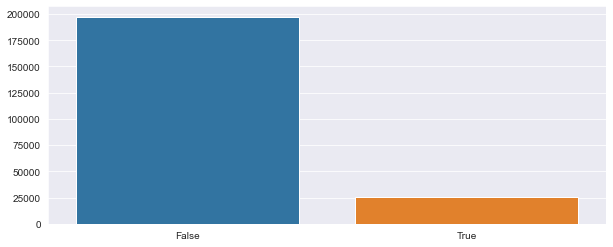

In [12]:
genders = clu.male_TF.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

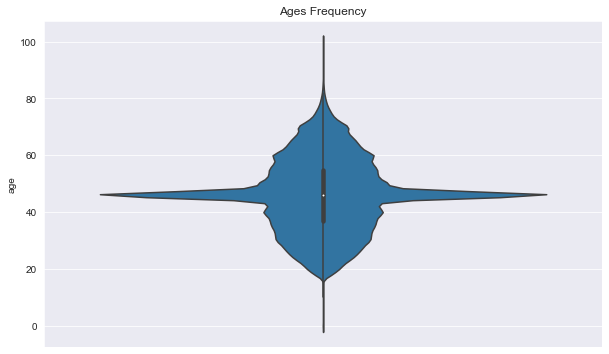

In [29]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=clu["age"])
plt.show()

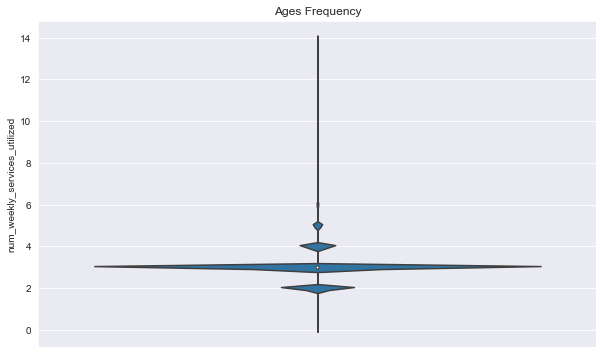

In [30]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=clu["num_weekly_services_utilized"])
plt.show()

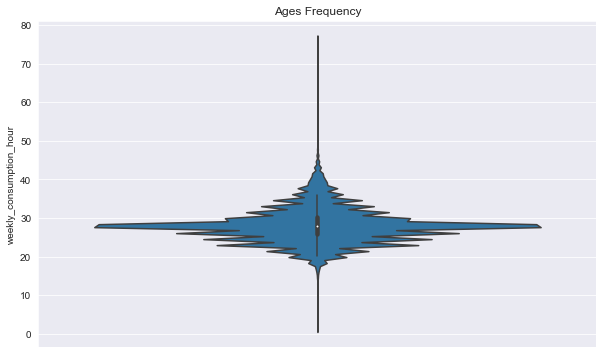

In [33]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=clu["weekly_consumption_hour"])
plt.show()

In [13]:
clu.describe()

,num_weekly_services_utilized,weekly_consumption_hour,age
count,223293.000000,223293.000000,223293.000000
mean,3.009237,28.028507,46.135975
std,0.587247,4.531202,12.806755
min,0.000000,1.200000,0.000000
25%,3.000000,25.900000,37.000000
50%,3.009237,28.028507,46.135975
75%,3.009237,30.200000,55.000000
max,14.000000,76.600000,100.000000


In [14]:
#Conver a few columns into certain behavioral category

clu["Service Utilization"] = pd.cut(
                       clu['num_weekly_services_utilized'],
                       bins = [0,2,14],          
                       labels= ["Low Usage","High Usage"]
                      )

clu["Consumption Hour"] = pd.cut(
                       clu['weekly_consumption_hour'],
                       bins = [1,20,28,80],          
                       labels= ["Low Consumption","Medium Consumption","High Consumption"]
                      )

clu["Age"] = pd.cut(
                       clu['age'],
                       bins = [1,30,55,100],          
                       labels= ["Young","Medium Age","Old"]
                      )


In [15]:
#transform to dummy variables

clu=pd.get_dummies(clu, columns=['intended_use'], sparse=False, drop_first=False, dtype=None)

clu=pd.get_dummies(clu, columns=['preferred_genre'], sparse=False, drop_first=False, dtype=None)

clu=pd.get_dummies(clu, columns=['package_type'], sparse=False, drop_first=False, dtype=None)

clu=pd.get_dummies(clu, columns=['attribution_technical'], sparse=False, drop_first=False, dtype=None)

clu=pd.get_dummies(clu, columns=['payment_type'], sparse=False, drop_first=False, dtype=None)

clu=pd.get_dummies(clu, columns=['op_sys'], sparse=False, drop_first=False, dtype=None)

clu=pd.get_dummies(clu, columns=['attribution_survey'], sparse=False, drop_first=False, dtype=None)




# Clustering Modeling

In [16]:
# Modeling librray
# Class to develop kmeans model
from sklearn.cluster import KMeans
# Scale data
from sklearn.preprocessing import StandardScaler
# Split dataset
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

# How good is clustering?
from sklearn.metrics import silhouette_score



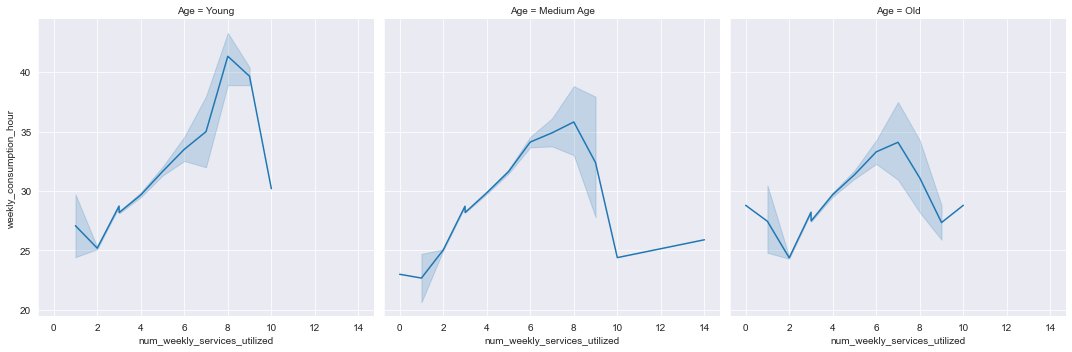

In [17]:
#Insightful Graphs 1
sns.relplot(x='num_weekly_services_utilized', y='weekly_consumption_hour', col='Age',kind="line",data=clu)

In [18]:
#Insightful Graphs 2
#sns.catplot(x='Age', y='weekly_consumption_hour', kind = "bar", hue = 'male_TF', data=clu)
#sns.catplot(x='Age', y='num_weekly_services_utilized', kind="bar", hue = 'male_TF', data=clu)

In [19]:
#Drop Categorical Columns for modeling
clu.drop(columns=['Consumption Hour','Service Utilization','Age'], inplace = True)

In [20]:
clu

,num_weekly_services_utilized,weekly_consumption_hour,age,male_TF,initial_credit_card_declined,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,...,attribution_survey_ott,attribution_survey_pinterest,attribution_survey_podcast,attribution_survey_public_radio,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube
0,3.009237,28.028507,46.135975,False,False,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.009237,23.000000,70.000000,False,False,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.000000,36.000000,25.000000,True,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.009237,20.100000,30.000000,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.000000,23.000000,28.000000,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,3.000000,28.800000,38.000000,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227624,2.000000,27.300000,49.000000,False,False,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
227625,3.009237,31.700000,45.000000,False,True,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227626,3.009237,28.028507,46.135975,False,False,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#MinMaxScaler: Scaling
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(clu)  # apply min_max scale

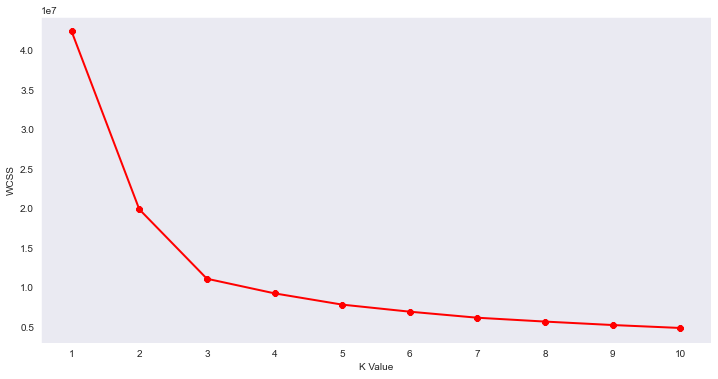

In [22]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(clu)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [23]:
## Using aic and bic measures to find ideal number of cluster

bic = []
aic = []
for i in range(8):
    gm = GaussianMixture(
                     n_components = i+1,
                     covariance_type='full')
    
    gm.fit(clu)
    bic.append(gm.bic(clu))
    aic.append(gm.aic(clu))
    
# Look at the plots

fig = plt.figure()
plt.plot([1,2,3,4,5,6,7,8], aic, marker = "d", label = 'aic')
plt.plot([1,2,3,4,5,6,7,8], bic, marker = "d", label = 'bic')
plt.show()


'\nbic = []\naic = []\nfor i in range(8):\n    gm = GaussianMixture(\n                     n_components = i+1,\n                     covariance_type=\'full\')\n    \n    gm.fit(clu)\n    bic.append(gm.bic(clu))\n    aic.append(gm.aic(clu))\n    \n# Look at the plots\n\nfig = plt.figure()\nplt.plot([1,2,3,4,5,6,7,8], aic, marker = "d", label = \'aic\')\nplt.plot([1,2,3,4,5,6,7,8], bic, marker = "d", label = \'bic\')\nplt.show()\n'

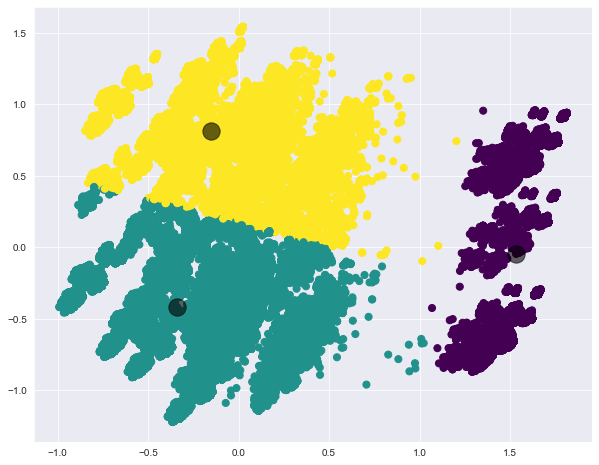

In [24]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal as mvn

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X)
gmm = GaussianMixture(n_components=3, covariance_type='full',
                      tol=0.001, reg_covar=1e-06, max_iter=100,
                      n_init=1, init_params='kmeans', weights_init=None, 
                      means_init=None, precisions_init=None, random_state=None, 
                      warm_start=False, verbose=0, verbose_interval=10).fit(Y_sklearn)

prediction_gmm = gmm.predict(Y_sklearn)
probs = gmm.predict_proba(Y_sklearn)

centers = np.zeros((3,2))
for i in range(3):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(Y_sklearn)
    centers[i, :] = Y_sklearn[np.argmax(density)]

plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction_gmm ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [25]:

labels=gmm.fit_predict(X, y=None)

clusters = c
clusters['Labels'] = labels

In [26]:
clusters

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,attribution_technical,attribution_survey,op_sys,initial_credit_card_declined,payment_type,Service Utilization,Consumption Hour,Age,Labels
0,economy,3.009237,comedy,access to exclusive content,28.028507,46.135975,False,facebook,facebook,Android,False,Standard Charter,High Usage,High Consumption,Medium Age,2
1,base,3.009237,comedy,access to exclusive content,23.000000,70.000000,False,facebook,facebook,NA,False,NA,High Usage,Medium Consumption,Old,2
2,enhanced,3.000000,regional,replace OTT,36.000000,25.000000,True,organic,facebook,iOS,False,NA,High Usage,High Consumption,Young,2
3,base,3.009237,drama,replace OTT,20.100000,30.000000,False,search,tv,Android,False,NA,High Usage,Medium Consumption,Young,2
4,base,4.000000,comedy,replace OTT,23.000000,28.000000,False,discovery,youtube,iOS,False,NA,High Usage,Medium Consumption,Young,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,enhanced,3.000000,comedy,supplement OTT,28.800000,38.000000,False,facebook,facebook_organic,iOS,False,NA,High Usage,High Consumption,Medium Age,0
227624,enhanced,2.000000,comedy,replace OTT,27.300000,49.000000,False,google_organic,referral,iOS,False,Paypal,Low Usage,Medium Consumption,Medium Age,2
227625,base,3.009237,comedy,access to exclusive content,31.700000,45.000000,False,facebook,facebook,iOS,True,NA,High Usage,High Consumption,Medium Age,2
227626,base,3.009237,comedy,access to exclusive content,28.028507,46.135975,False,facebook,facebook,iOS,False,Paypal,High Usage,High Consumption,Medium Age,2


In [28]:
clusters.to_csv(r'/Users/yankeyu/Desktop/clusters.csv', index = False, header=True)